# Milestone 2 - CasierVert952

## 0. Initial configuration

### 0.1 Data preprocessing

In this phase, we will start by demonstrating how we transformed the ```TXT``` ratings files (for both BA and RB) into CSV format. Next, we will merge the various data files and rename the columns to create a dataframes containing all available feature for each of the datasets. Afterward we will clean and modify some features such as dates and locations to meet our needs. Finally, we will save the cleaned data into ```CSV``` files to be able to load them quickly.

This step can be found on [data_preprocessing.ipynb](data_preprocessing.ipynb), which has to be entirely executed once to be able to run the following cells.

The ```data``` directory should now look like this :

```
data/
├── BeerAdvocate
│   ├── beers.csv
│   ├── breweries.csv
│   ├── users.csv
│   ├── ratings.csv
│   └── BA_cleaned.csv
│
├── RateBeer
│   ├── beers.csv
│   ├── breweries.csv
│   ├── users.csv
│   ├── ratings.csv
│   └── RB_cleaned.csv
│
└── US president
    ├── 1976-2020-president.csv
    └── sources-president.csv
```

### 0.2 Importation of libraries and golbal variable declarations

In [1]:
exec(open('python/section_0_imports.py').read())

## 1. Data loading and visualization

### 1.1 Loading cleaned data

The preprocessing task having already been done, the cleaned data just has to be loaded. It can take up to 2 minutes to complete.

In [2]:
from section_1_data_loading import load_data_BA, load_data_RB

# Load the data for the BA dataset
BA_cleaned, BA_beers, BA_breweries, BA_users = load_data_BA(BA_DATA_PATH)

# Load the data for the RB dataset
RB_cleaned, RB_beers, RB_breweries, RB_users = load_data_RB(RB_DATA_PATH)

Loading of BA data ended in 73.7467691898346 seconds.
Loading of RB data ended in 49.57367253303528 seconds.


### 1.2 Data visualization

The following illustrates the structure of our data after the preprocessing. In the future we will explore and refine our data, and then for the analyses we will create derived DataFrames from ```BA_cleaned``` and ```RB_cleaned``` by copying them and then, removing, modifying, and adding features to these copies as needed.

In [3]:
# Display 3 samples of the BA dataset
print("Visualization of BA :")
display(BA_cleaned.sample(3).T)

# Display 3 samples of the RB dataset
print("\nVisualization of RB :")
display(RB_cleaned.sample(3).T)

Visualization of BA :


,6061034,7195177,4486684
rating_date,05-2013,08-2014,11-2014
rating_appearance,NaN,NaN,NaN
rating_aroma,NaN,NaN,NaN
rating_palate,NaN,NaN,NaN
rating_taste,NaN,NaN,NaN
rating_overall,NaN,NaN,NaN
rating,3.0,4.0,3.52
beer_id,1171,39965,386
beer_name,Summertime,Blackbeerd Imperial Stout,Paulaner Oktoberfest-Märzen
beer_style,Kölsch,Russian Imperial Stout,Märzen / Oktoberfest



Visualization of RB :


,1303641,592211,2533418
rating_date,06-2015,12-2015,01-2017
rating_appearance,5,4,3
rating_aroma,8,6,7
rating_palate,5,4,3
rating_taste,8,7,8
rating_overall,16,14,15
rating,4.2,3.5,3.6
beer_id,256644,363722,477996
beer_name,De Garde Brun Marron,Drygate Chop House Pale Ale,Flat12 Maple East Brown
beer_style,Sour Red/Brown,American Pale Ale,Brown Ale


> Here, it can be seen that there is the user's information and his rating on a particular beer. Attached to that, there is a variety of data about the beer characteristics and informations about its corresponding brewery. We will later remove some of these features, as they are not all required.
>
> It can also be seen that BA and RB have different features sets. Moreover, some data are missing, the fields may be empty (NaN).

## 2. Data exploration of the two beers's datasets 

Indeed, we are given two different but very similar datasets to perform our analysis. Let's begin by examining them to determine the best approach : using one dataset only, combining both, or creating a blend of the two. We will use these discoveries in the next section when 
refiningthe data. 


### 2.1 Sizes

We will first look into their size.

In [4]:
# Print sizes of each Dataframe for both datasets.
print("BA :")
print("   Number of ratings   : " + str(BA_cleaned.shape[0]))
print("   Number of beers     : " + str(BA_beers.shape[0]))
print("   Number of breweries : " + str(BA_breweries.shape[0]))
print("   Number of users     : " + str(BA_users.shape[0]))

print("\nRB :")
print("   Number of ratings   : " + str(RB_cleaned.shape[0]))
print("   Number of beers     : " + str(RB_beers.shape[0]))
print("   Number of breweries : " + str(RB_breweries.shape[0]))
print("   Number of users     : " + str(RB_users.shape[0]))

BA :
   Number of ratings   : 8392192
   Number of beers     : 280823
   Number of breweries : 16758
   Number of users     : 153704

RB :
   Number of ratings   : 7123070
   Number of beers     : 442081
   Number of breweries : 24189
   Number of users     : 70174


> The RB dataset contains more data on different beers and breweries, but less users than the BA one. Both datasets have around 7-8 millions user's ratings, which seems at first sight enough to perfom our analysis.

### 2.2 Missing values

We will check how many value are missing the features columns. It will help us to decide what to remove during the "Data refinement" phase.

In [5]:
from section_2_data_exploration import compute_missing_value_in_datsets

# Computing missing value for all field for both datasets
missing_data_BA, missing_data_RB = compute_missing_value_in_datsets(BA_cleaned, RB_cleaned)

# Print the results for both datasets (one after the other)
display(missing_data_BA, missing_data_RB)

,Column,Missing Values (BA),% (BA)
beer_avg_matched_valid_ratings,beer_avg_matched_valid_ratings,7464671,88.947810
beer_zscore,beer_zscore,7436327,88.610068
beer_bros_score,beer_bros_score,5283785,62.960726
rating_aroma,rating_aroma,3622979,43.170831
rating_palate,rating_palate,3622979,43.170831
rating_taste,rating_taste,3622979,43.170831
rating_overall,rating_overall,3622979,43.170831
rating_appearance,rating_appearance,3622979,43.170831
breweries_state,breweries_state,1481852,17.657508
user_state,user_state,1089052,12.976967


,Column,Missing Values (RB),% (RB)
beer_zscore,beer_zscore,6102391,85.670799
beer_avg_matched_valid_ratings,beer_avg_matched_valid_ratings,6102391,85.670799
breweries_state,breweries_state,4111124,57.715620
user_state,user_state,4014385,56.357512
overall_score,overall_score,861022,12.087794
style_score,style_score,844833,11.860518
user_country,user_country,203670,2.859301
user_location,user_location,203670,2.859301
beer_abv,beer_abv,174964,2.456300
user_join_date,user_join_date,2625,0.036852


> Here, we see that our data of interest (mainly user_location, breweries locations and ratings) have some missing values in the user_location column, meaning these ratings will have to get discarded later. Additionnaly, we see that breweries_state and user_state are frequently missing but this is normal because sometimes the user might not be located in the US and the state is not precised in these cases.

### 2.3 Country Representation

To be able to have a proper study on the influence of politics on beer appreciation, we need to investigate the representation of countries in both datasets. This will assist us in selecting the most appropriate political datasets for our final analyses.

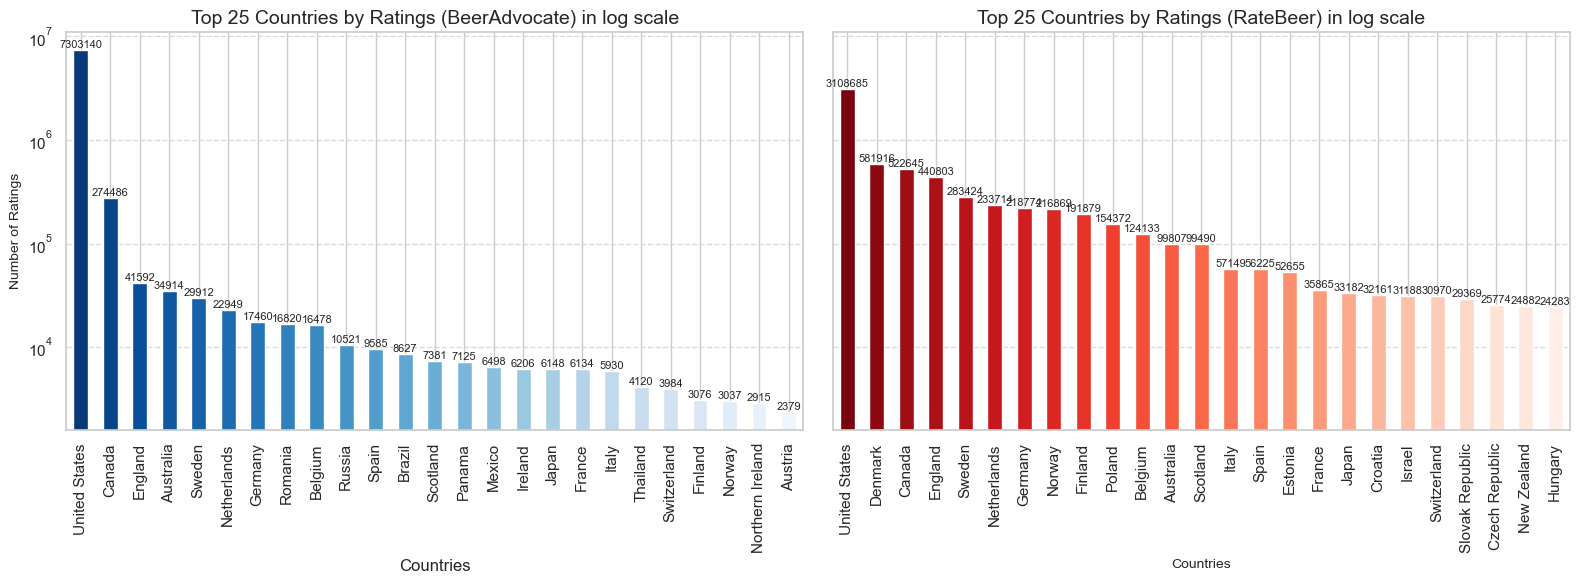

In [6]:
from section_2_data_exploration import ploting_country_representation

# Compute number of ratings per country
BA_count_per_country = BA_cleaned.groupby('user_country').size().nlargest(25)
RB_count_per_country = RB_cleaned.groupby('user_country').size().nlargest(25)

# Plotting the results
ploting_country_representation(BA_count_per_country, RB_count_per_country, 'log')

In [7]:
# Top 10 country ratings with precise values
country_comparison = pd.DataFrame({'Country (BA)': BA_count_per_country.index,'# of Ratings (BeerAdvocate)': BA_count_per_country.values,'% of Ratings (BeerAdvocate)': np.round(BA_count_per_country.values / len(BA_cleaned) * 100, 2),'Country (RB)': RB_count_per_country.index,'# of Ratings (RateBeer)': RB_count_per_country.reindex(RB_count_per_country.index, fill_value=0).values,'% of Ratings (RateBeer)': np.round(RB_count_per_country.reindex(RB_count_per_country.index, fill_value=0).values / len(RB_cleaned) * 100, 2)})
country_comparison.index = range(1, len(country_comparison) + 1)
country_comparison.head(10)

,Country (BA),# of Ratings (BeerAdvocate),% of Ratings (BeerAdvocate),Country (RB),# of Ratings (RateBeer),% of Ratings (RateBeer)
1,United States,7303140,87.02,United States,3108685,43.64
2,Canada,274486,3.27,Denmark,581916,8.17
3,England,41592,0.50,Canada,522645,7.34
4,Australia,34914,0.42,England,440803,6.19
5,Sweden,29912,0.36,Sweden,283424,3.98
6,Netherlands,22949,0.27,Netherlands,233714,3.28
7,Germany,17460,0.21,Germany,218774,3.07
8,Romania,16820,0.20,Norway,216869,3.04
9,Belgium,16478,0.20,Finland,191879,2.69
10,Russia,10521,0.13,Poland,154372,2.17


> We see that most of the ratings for both sites comes from USA and Canada first and then from European countries. It's not a problem for our project that will focus mainly on politics from US/Canada and European countries.

To be sure that we are not losing too much data from other continents, we will compute the percentage of ratings coming from US/Canada together and Europe together.

In [8]:
# Importing lists of countries (NA and EU) and the tool function
from helpers import european_countries, north_america_countries
from section_2_data_exploration import computing_NA_EU_countries

# Compute and print the percentage of rating in EU and NA
computing_NA_EU_countries(country_comparison, north_america_countries, european_countries)

NA:
   Total % of ratings (BA) : 90.3 %
   Total % of ratings (RB) : 51.0 %

EU:
   Total % of ratings (BA) : 2.3 %
   Total % of ratings (RB) : 38.7 %

Other continents (loss):
   Total % of ratings (BA) : 7.4 %
   Total % of ratings (RB) : 10.3 %


#### 2.3.1 Observations for BeerAdvocate

    - 90.3% of ratings from North America, 87% from US
    - 2.3% of ratings from Europe
    - 7.4% of ratings from other continents

> As our goal is to find relations between politics orientations and beers habits, we see that this datasets can help us to do it for north america (US and Canada) since most of ratings come from there. Meanwhile this dataset might not be adequate for Europe since it only represents 2.3% of the users's ratings. Since our analyses will be focused on US, the data that won't be used is about 9.7% (EU and Others).


#### 2.3.2 Observations for RateBeer

    - 51% of ratings from North America, 43.6% from US
    - 38.7% of ratings from Europe
    - 10.3% of ratings from other continents

> Since the repartition between country is more fair, this dataset could also be used for analyses about Europe, but we won't do it as we focus on US only. The data that won't be used represent 50% of the dataset which is, this time, very significant.

### 2.4 Ratings distribution over users

It is also interesting to explore the quantity of ratings that each user has published. Do we give more importance to regular users than to occasional ones ? Are users who have thousands and thousands of ratings relevant ? Are theses users biasing our results ?

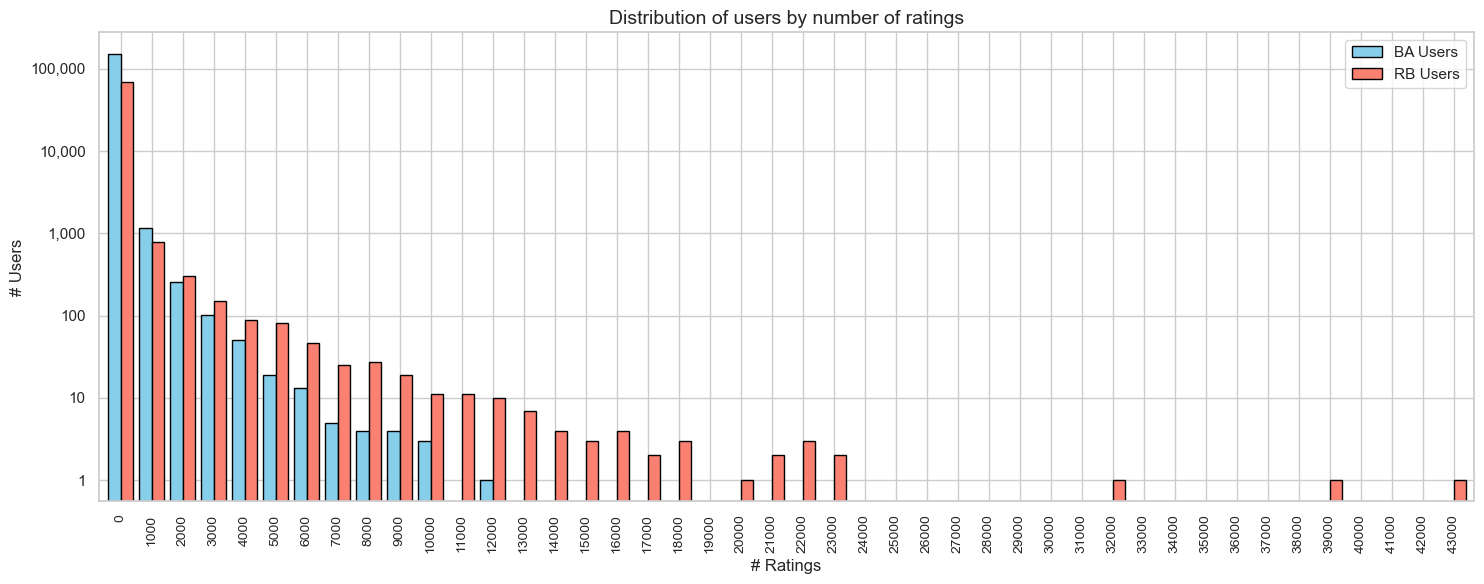

In [9]:
from section_2_data_exploration import ploting_user_ratings_distribution, number_ratings_by_user

# Get the number of ratings by user into bins
BA_ratings_bins, RB_ratings_bins, RB_ratings_by_user = number_ratings_by_user(BA_cleaned, RB_cleaned)

# Ploting the #ratings by users data
ploting_user_ratings_distribution(BA_ratings_bins, RB_ratings_bins)

> We observe that the distribuition of the BA datasets is smoother than the RB one. For the RB datasets, we notice around ten people above the 20,000 reviews, these people can be the origin of bias in our results as they have put so many ratings.

Let's analyse the origin of these high-rating users.

In [10]:
from section_2_data_exploration import high_rated_users_by_country

# Show ratings by contry (only ratings of high rating users)
high_rated_users_by_country(10000, RB_ratings_by_user, RB_cleaned)

,0,1,2,3,4,5,6,7,8,9,10,11,12
user_country,Denmark,United States,England,Canada,Sweden,Germany,Finland,Norway,Netherlands,Scotland,Estonia,Israel,Switzerland
#ratings,316452,188328,108944,84832,61759,59936,49773,39463,37290,31789,14443,12594,11156


> We see that if we choose to remove all ratings of users that made more than 10'000 reviews isn't a real problem for us, as the majority of removed ratings would be from european users. We would still exclude more than 188,000 ratings from the US. However, this is not necessarily detrimental to our analysis, as the political opinions of users who have submitted 100 times more ratings than the average tend to be disproportionately weighted.

### 2.5 Ratings distribution over months

In our analyses, we will compare political properties with beer properties over time. It is important to examine the distribution of ratings across different months to ensure the relevance and validity of our results.

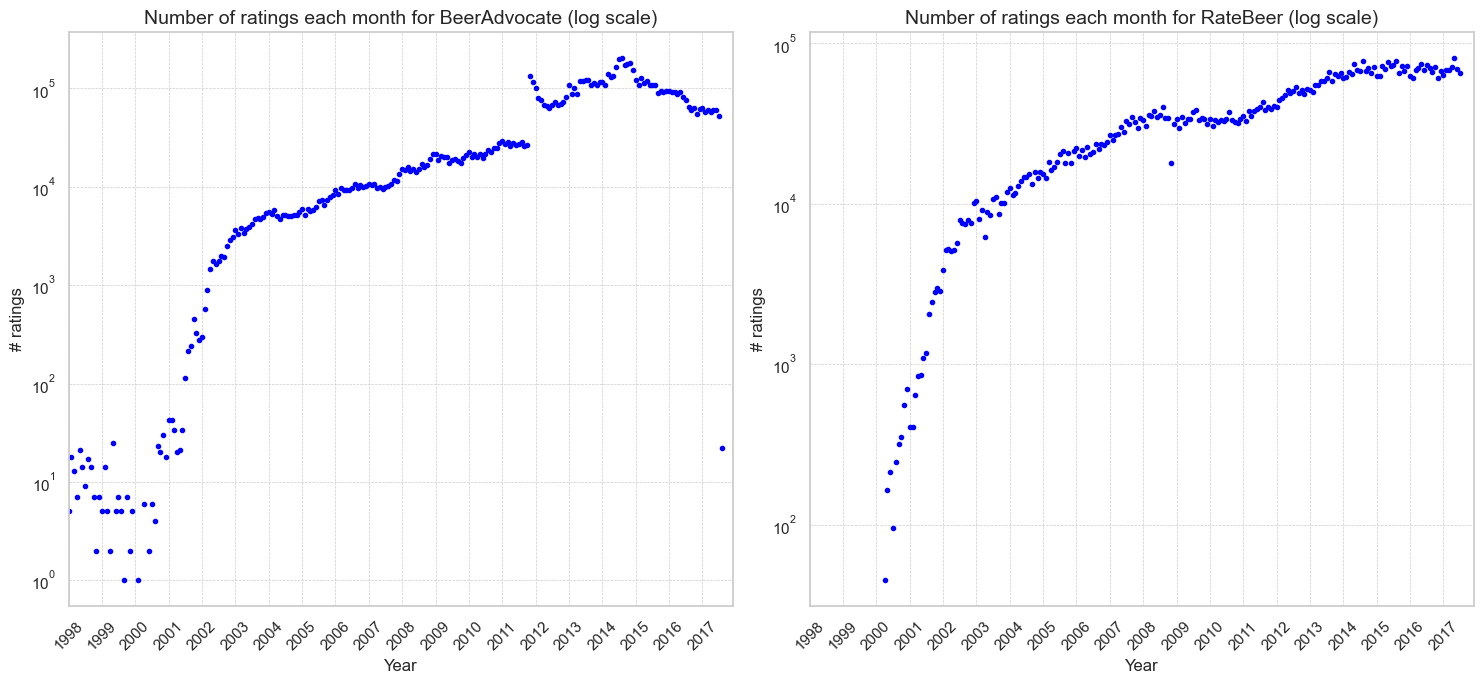

In [11]:
from section_2_data_exploration import ploting_ratings_by_month

# compute the #ratings by month
BA_ratings_by_month = BA_cleaned.groupby('rating_date').size().reset_index(name='#ratings').sort_index()
BA_ratings_by_month['rating_date'] = pd.to_datetime(BA_ratings_by_month['rating_date'], format='%m-%Y')

RB_ratings_by_month = RB_cleaned.groupby('rating_date').size().reset_index(name='#ratings').sort_index()
RB_ratings_by_month['rating_date'] = pd.to_datetime(RB_ratings_by_month['rating_date'], format='%m-%Y')

# plot the #ratings by months data
ploting_ratings_by_month(BA_ratings_by_month, RB_ratings_by_month, "log")

**For BeerAdvocate :**

> *Before 2002, the number of user ratings each month is very low (under 1000), which may pose problems for conducting a reliable statistical analysis. On the contrary, starting from 2007, there are more than 10,000 ratings per month, providing a solid foundation for more precise analysis. It can also be noted that starting from 2012, the data shows significant volatility, with the number of ratings varying greatly from one month to the next one.*

**For RateBeer :**

> *Before 2003, there is limited data, but after that year, the graph shows a consistent increase of data every month. This suggests that we can have more confidence in our results for the later years.*

### 2.6 Ratings distribution over beers

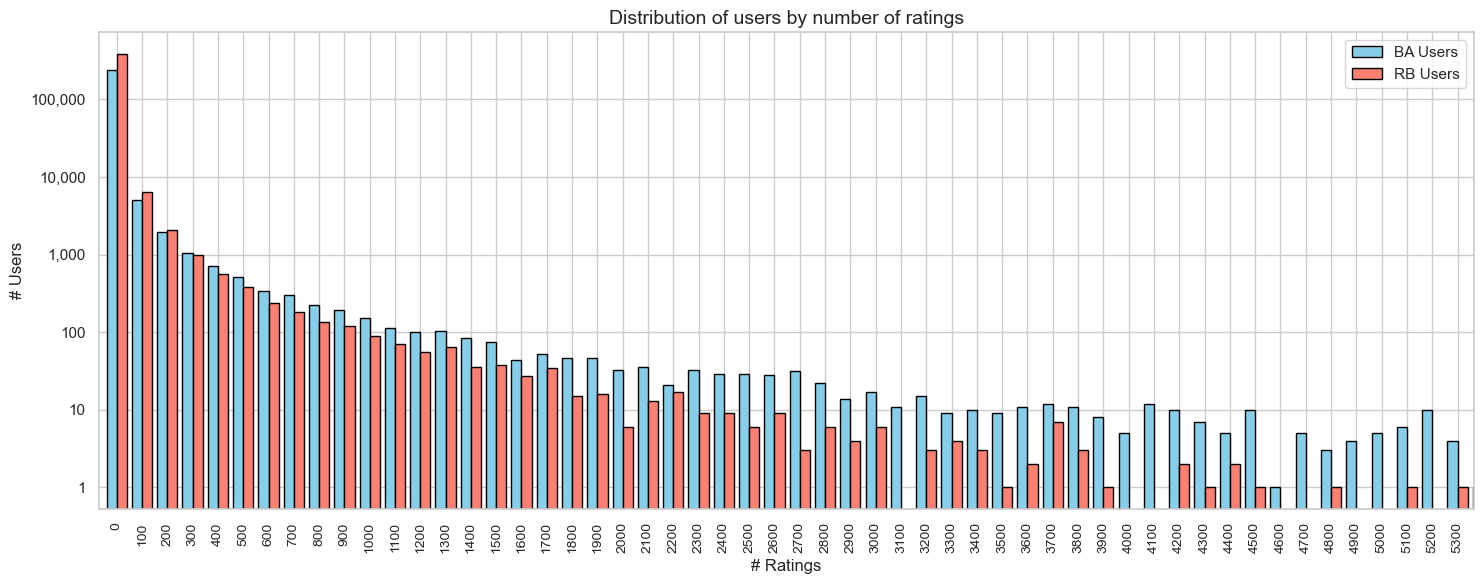

In [12]:
from section_2_data_exploration import ploting_beer_ratings_distribution, number_ratings_by_beer

# Get the number of ratings by beer into bins
BA_ratings_bins, RB_ratings_bins = number_ratings_by_beer(BA_cleaned, RB_cleaned)

# Ploting the #ratings by users data
ploting_beer_ratings_distribution(BA_ratings_bins, RB_ratings_bins)

> We observe that most of the beers have less than few hundreds of ratings and only a hundred of them have more than 3'000 ratings.

### 2.7 Duplicates

Here we want to observe the duplicate in the same dataset. By duplicate, we mean ratings on the same beer (```beer_id```) and from the same user (```user_id```).

In [13]:
# Check for duplicate for 'user_id' and 'beer_id' columns
duplicates_BA = BA_cleaned[BA_cleaned.duplicated(subset=['user_id', 'beer_id'], keep=False)]
duplicates_RB = RB_cleaned[RB_cleaned.duplicated(subset=['user_id', 'beer_id'], keep=False)]
duplicates_RB_usa = duplicates_RB.loc[duplicates_RB['user_country'].str.contains('United States', case = False, na = False)]

print("There is " + str(duplicates_BA.shape[0]) + " duplicate for BA dataset.")
print("There is " + str(duplicates_RB.shape[0]) + " duplicate for RB dataset, including " + str(duplicates_RB_usa.shape[0]) + " from USA.")

There is 0 duplicate for BA dataset.
There is 1964 duplicate for RB dataset, including 1802 from USA.


We observe that there is 1802 duplicate ratings for USA in the RB dataset and none in the BA one.

It seems that the two beer rating websites don't have the same policies regarding new ratings for beers that have already been rated by the user :

- BA seems to replace the previous user rating by the new one.
- RB seems to keep the old user ratings and add the new one.

In the next section (Data refinement), we will take care of retaining only the most recent user ratings when duplicates appears.

## 3. Beers data refinement

In this section, we will discuss our choice of removing some features and some ratings elements due to the quality of the data and the needs we have for it.

### 3.1 Dropping useless columns

The datasets contains really a lot of different informations about the beers, the users and the breweries. All these informations are not requiered for further the analyses and we can just drop them. Moreover, we make sure to have the same set of remaining columns on both datasets.

In [14]:
# list containing the colomns we want to drop
BA_columns_to_drop = ['beer_avg_matched_valid_ratings', 'beer_zscore', 'beer_bros_score', 'beer_ba_score', 'user_join_date', 'user_name', 'beer_nbr_reviews', 'user_nbr_reviews']
RB_columns_to_drop = ['beer_avg_matched_valid_ratings', 'beer_zscore', 'user_join_date', 'user_name', 'overall_score', 'style_score']

# dropping of the columns in both datasets
BA_cleaned = BA_cleaned.drop(columns = BA_columns_to_drop)
RB_cleaned = RB_cleaned.drop(columns = RB_columns_to_drop)

### 3.2 Dropping ratings with the user's location not available

Let first compute the number of missing user's location.

In [15]:
# Computing the number of ratings where the user's location is missing
BA_unavailable_user_loc = BA_cleaned['user_location'].isna().mean() * 100
RB_unavailable_user_loc  = RB_cleaned['user_location'].isna().mean() * 100

print("BA: Total % of missing user location : " + str(round(BA_unavailable_user_loc, 2)) + "%")
print("RB: Total % of missing user location : " + str(round(RB_unavailable_user_loc, 2)) + "%")

BA: Total % of missing user location : 5.96%
RB: Total % of missing user location : 2.86%


Here, we can see that the amount of data that will get discarded is not negligeable (6% and 3%), but this field is crucial for our analysis, so we decided to remove the ratings where the user location is missing.

In [16]:
# dropping the elements with no user_location
BA_refined = BA_cleaned.dropna(subset = ['user_location'])
RB_refined = RB_cleaned.dropna(subset = ['user_location'])

### 3.3 More specific data refinements

We have seen some particularities of the datasets during the data exploration phase. In this section, we implement our decisions to remove some parts of the data that could potentially reduce the accuracy of our results. We will handle the following case :

- Month distribution
- Ratings by user ditribution
- Duplicates

#### 3.3.1 Handle month distribution

We choose to keep the data corresponding to low-rating months, as it remains relevant for analyses that do not require a month-by-month or year breakdown.

However we keep in mind the information that the number of ratings greatly varies across months and years. It will be handled at analysis time if requiered.

#### 3.3.2 Handle ratings by user ditribution

We see in the exploration phase that removing all ratings of users that made more than 10'000 reviews isn't a real problem for us, as the majority of removed ratings are from european users. We will still remove more than 188k ratings. However, this is not necessarily detrimental to our analysis, as the political opinions of users who have submitted 100 times more ratings than the average tend to be disproportionately weighted.

#### TODO Faire la suppression

#### 3.3.3 Handle duplicates

#### TODO Faire la suppression

### 3.4 Creating dataframe of only US users

Based on the findings from the data exploration in the country section, and for the scope of our analysis section (5.), we create a Dataframe containing only the ratings of US residents.

In [17]:
# create Dataframe of only USA users
BA_usa = BA_refined.copy().loc[BA_cleaned['user_country'].str.contains('United States', case = False, na = False)]
RB_usa = RB_refined.copy().loc[RB_cleaned['user_country'].str.contains('United States', case = False, na = False)]

In [18]:
BA_usa.head()

,rating_date,rating_appearance,rating_aroma,rating_palate,rating_taste,rating_overall,rating,beer_id,beer_name,beer_style,...,brewery_name,breweries_location,breweries_country,breweries_state,breweries_nbr_beers,user_id,user_nbr_ratings,user_location,user_country,user_state
0,02-2009,3.0,3.5,3.50,4.00,3.5,3.67,19590,Barelegs Brew,English Pale Ale,...,Strangford Lough Brewing Company Ltd,Northern Ireland,Northern Ireland,NaN,5,stjamesgate.163714,2521,"United States, New York",United States,New York
1,08-2013,3.5,3.5,3.75,3.75,3.5,3.63,98728,300,English Pale Ale,...,Whitewater Brewing Co,Northern Ireland,Northern Ireland,NaN,21,stjamesgate.163714,2521,"United States, New York",United States,New York
2,01-2011,4.0,3.5,4.00,4.00,4.0,3.88,16371,Belfast Ale,English Pale Ale,...,Whitewater Brewing Co,Northern Ireland,Northern Ireland,NaN,21,stjamesgate.163714,2521,"United States, New York",United States,New York
3,10-2011,4.5,3.5,4.00,3.50,4.0,3.71,38838,Belfast Lager,Munich Helles Lager,...,Whitewater Brewing Co,Northern Ireland,Northern Ireland,NaN,21,stjamesgate.163714,2521,"United States, New York",United States,New York
4,09-2012,3.5,4.5,4.00,4.50,4.0,4.29,33820,Clotworthy Dobbin,Irish Red Ale,...,Whitewater Brewing Co,Northern Ireland,Northern Ireland,NaN,21,stjamesgate.163714,2521,"United States, New York",United States,New York


### 3.5 Fusioning of the two dataframe

### TODO Retirer les matched (si on trouve a quoi ca correspond) + text a faire

In [19]:
# Put value columns in the same types
BA_usa[['rating_appearance', 'rating_aroma', 'rating_palate', 'rating_taste', 'rating_overall']] = BA_usa[['rating_appearance', 'rating_aroma', 'rating_palate', 'rating_taste', 'rating_overall']].astype(float)
RB_usa[['rating_appearance', 'rating_aroma', 'rating_palate', 'rating_taste', 'rating_overall']] = RB_usa[['rating_appearance', 'rating_aroma', 'rating_palate', 'rating_taste', 'rating_overall']].astype(float)

# Add a source columns
BA_usa['source'] = 'BA'
RB_usa['source'] = 'RB'

# Fusioning the two datasets
USA_data = pd.concat([BA_usa, RB_usa], ignore_index = True)

In [20]:
print(BA_usa.shape)
print(RB_usa.shape)
print(USA_data.shape)

(7303140, 27)
(3108685, 27)
(10411825, 27)


### 3.6 Computing beers preferences

In this section, we will try to determine what are the favourite beers. One might argue that preferences can be simply identified by looking at the average rating of each beer. However, beers with only a few ratings may be over or under evaluated. Conversely, one could claim that the number of ratings a beer receives is a better indicator of its popularity. Here again it seams to not fullfil the concept of preference.

To solve that problem, we design a simple formula that compute a preference score for each beer. The score of a beer depends on two parameters :

$$ R \text{ : average rating of the beer} $$
$$ N \text{ : number of rating on that beer} $$

The formula we design is the following :

$$ Score =  R \cdot f(N) $$

where $$ f(N) = \min\left(1, {\log_{100}(N + 1)}\right) $$

The formula act as follow :
    - If the beer has more than 100 reviews, the average rating is trusted and the score is simply the average rating.
    - If the beer has less than 100 reviews, we considered that the average rating cannot be trusted, and score is the average rating reduced by a factor.

The reduce factor is computed using the funstion ```f(N)``` which is the logarithm function shown below. It grows as the rating number goes close to 100 and 
The reduction factor is calculated using the function ```f(N)``` (shown below), which is based on the logarithmic function. As the number of ratings approaches 100, the reduction factor increases and approaches 1.

In [21]:
from section_3_data_refinement import calculate_max_stability_threshold_on_all_beers

grouped_rating_by_beer = USA_data[['rating', 'beer_id']].groupby('beer_id')

# computing the thresold X
max_stability_threshold = calculate_max_stability_threshold_on_all_beers(grouped_rating_by_beer, 0.05, 10)
print("The maximal stability threshold found is : " + str(max_stability_threshold))

# Deleting the varriable in memory
del grouped_rating_by_beer

The maximal stability threshold found is : 107


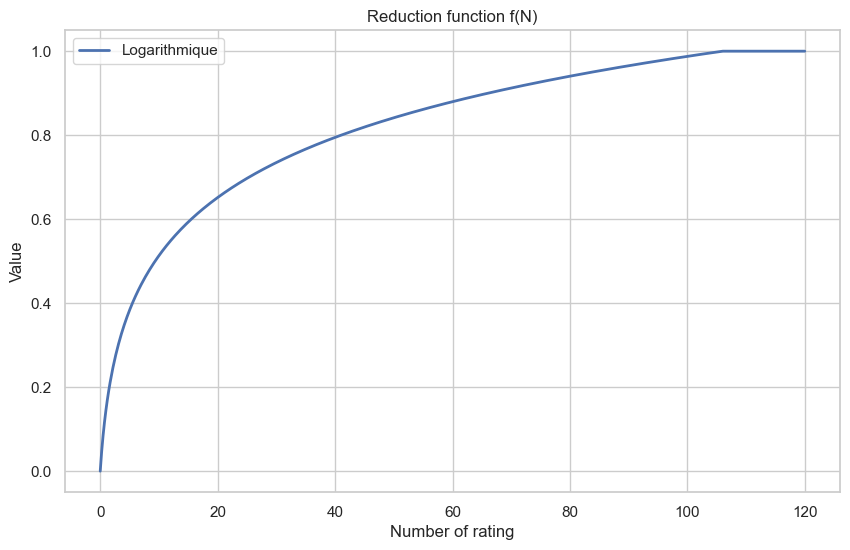

In [22]:
from section_3_data_refinement import show_reduction_function

show_reduction_function(max_stability_threshold)

In [23]:
from section_3_data_refinement import logarithmic

# compute the R, N for each beer
R = USA_data.groupby('beer_id')['rating'].mean()
N = USA_data.groupby('beer_id')['rating'].size()

# compute the score for each beer
score = R * logarithmic(N,max_stability_threshold)

# adding the score to ratings dataframe
USA_data['preference_score'] = USA_data['beer_id'].map(score)

# creating a dataframe of beer preferences
beer_preference = pd.DataFrame({'Score': score, 'Average Rating': R, 'Number of ratings': N})
beer_preference_sorted = beer_preference.sort_values(by='Score', ascending=False)

# display the 5 best beers
beer_preference_sorted.head(10)

,Score,Average Rating,Number of ratings
beer_id,,,
78820,4.826605,4.826605,542
62397,4.805921,4.805921,1221
136936,4.784807,4.784807,961
91693,4.752087,4.752087,230
87846,4.748750,4.748750,712
87246,4.748208,4.748208,1194
237238,4.747255,4.747255,368
110635,4.745899,4.745899,1346
68548,4.739186,4.739186,344


## 4. US Politics external datasets processing

As we saw before, the majority of the ratings came from the USA for both websites. Thus, the first analysis will be on US politics.

### 4.1 Data loading

Loading the external data concerning the politic oriantation of states over the years.

In [24]:
# create a dataframe containing the number of votes for each candidate for each US state
us_pres_df = pd.read_csv('./data/US president/1976-2020-president.csv')
us_pres_df = us_pres_df.loc[us_pres_df.year > 1998].reset_index()

# get the % of vote
us_pres_df['vote_percent'] = us_pres_df['candidatevotes'] / us_pres_df['totalvotes'] * 100

# print to get a look
us_pres_df.head(2)

,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,vote_percent
0,2042,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,941173,1666272,20210113,NaN,REPUBLICAN,56.483755
1,2043,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"GORE, AL",DEMOCRAT,False,692611,1666272,20210113,NaN,DEMOCRAT,41.566503


> Here we can see that there are multiple candidates for the elections which means that we won't be able to take 100% of the votes because we will only be considering Republican votes or Democrat votes.

### 4.2 Computing Republicans score percentage by state/year

In [25]:
# extract only the republican results
republican_score = us_pres_df.loc[us_pres_df['party_simplified'] == 'REPUBLICAN'].copy().reset_index()

# create a dataframe with row=states and column=election year.
rep_year_score_df = republican_score.pivot_table(index = 'state_po', columns = 'year', values = 'vote_percent', aggfunc = 'sum')

#useful for following part
rep_year_ = republican_score.pivot_table(index = ('state_po', 'state'), columns = 'year', values = 'vote_percent', aggfunc = 'sum')

# add a column with average percent result over 2000-2020
rep_year_score_df['Average'] = rep_year_score_df.mean(axis = 1)
rep_year_['Average'] = rep_year_.mean(axis = 1)
rep_year_ = rep_year_.sort_values(by = 'Average', ascending = False)

# display the top 5 most republican states over 6 elections
rep_year_score_df.sort_values(by = 'Average', ascending = False).head(5)

year,2000,2004,2008,2012,2016,2020,Average
state_po,,,,,,,
WY,69.222743,68.739569,64.713775,68.193585,67.398411,69.499790,67.961312
OK,60.307852,65.570402,65.645081,66.772320,65.322865,65.373272,64.831965
ID,67.170439,68.390945,61.517091,64.529783,59.261432,63.837565,64.117876
UT,66.830143,71.535948,62.583870,72.790533,45.540817,58.129839,62.901858
AL,56.483755,62.460690,60.316913,60.545822,62.083092,62.031643,60.653653


> We observe that the states that vote much more republican than democrat are Wyoming, Oklahoma,Idaho, Utah and Alabama

### 4.3 Computing Democrats score percentage by state/year

In [26]:
# extract only the democrat results
democrat_score = us_pres_df.loc[us_pres_df['party_simplified'] == 'DEMOCRAT'].copy().reset_index()

# create a dataframe with row=states and column=election year.
dem_year_score_df = democrat_score.pivot_table(index = 'state_po', columns = 'year', values = 'vote_percent',aggfunc = 'sum')

# doing some preprocessing
dem_year_ = democrat_score.pivot_table(index = ('state_po', 'state'), columns = 'year', values = 'vote_percent',aggfunc = 'sum')
dem_year_['Average'] = dem_year_.mean(axis = 1)
dem_year_ = dem_year_.sort_values(by = 'Average', ascending = False)

# add a column with average percent result over 2000-2020
dem_year_score_df['Average'] = dem_year_score_df.mean(axis = 1)

# display the top 5 most democrat states over 6 elections
dem_year_score_df.sort_values(by = 'Average', ascending = False).head(5)

year,2000,2004,2008,2012,2016,2020,Average
state_po,,,,,,,
DC,85.155081,89.183869,92.457110,90.913114,90.483884,92.149694,90.057125
HI,55.791668,54.009552,71.452910,70.147932,60.980798,63.149380,62.588707
MA,59.126126,61.616660,61.363199,60.338308,59.050065,65.122984,61.102890
VT,50.634709,58.937463,67.455683,66.570550,55.722742,65.455781,60.796155
MD,56.488308,55.971761,61.919345,61.974191,60.328549,65.360665,60.340470


> We notice that the states that vote much more democrat than republican are DC, Hawaii, Massachusetts, Vermont and Maryland

### 4.4 Other parties score percentage by state/year

In [27]:
# extract only the other results
other_score = us_pres_df.loc[us_pres_df['party_simplified'] == 'OTHER'].copy().reset_index()

# create a dataframe with row=states and column=election year.
other_year_score_df = other_score.pivot_table(index = 'state_po', columns = 'year', values = 'vote_percent', aggfunc = 'sum', fill_value = 0)

# add a column with average percent result over 2000-2020
other_year_score_df['Average'] = other_year_score_df.mean(axis = 1)

# display the top 5 of the states that vote for independant candidates
other_year_score_df.sort_values(by = 'Average', ascending = False).head()

year,2000,2004,2008,2012,2016,2020,Average
state_po,,,,,,,
NY,10.801017,6.027054,8.272034,7.335715,10.737016,1.451418,7.437376
UT,6.355984,2.104664,2.278946,1.224151,23.496863,1.640810,6.183570
AK,12.789606,2.881976,2.198978,1.925822,6.290489,1.920285,4.667859
VT,8.401742,1.908366,1.766827,1.291724,11.373090,3.190572,4.655387
ME,6.470528,1.585416,1.910244,3.011212,5.241536,2.214643,3.405597


> New york and Utah are the only two states where the other parties make more than 5% on average

### 4.5 Computing difference in voting percentage

In [28]:
# create a dataframe of percent difference in results between democrats and republican.
# positive indicates republican perform better, negative indicates democrats perform better
delta_df = rep_year_score_df - dem_year_score_df

# add a column of average difference over the years
delta_df['Average'] = delta_df.mean(axis = 1)

# display it
delta_df.head()


year,2000,2004,2008,2012,2016,2020,Average
state_po,,,,,,,
AK,30.954615,25.548468,21.535146,13.988918,14.730641,10.061191,19.469830
AL,14.917252,25.616287,21.576479,22.186789,27.725147,25.461653,22.913935
AR,5.442941,9.758329,19.851245,23.687946,26.920978,27.620668,18.880351
AZ,6.286553,10.472601,8.519997,9.064766,3.543962,-0.308710,6.263195
CA,-11.798240,-9.947862,-24.057780,-23.118581,-30.109293,-29.163223,-21.365830


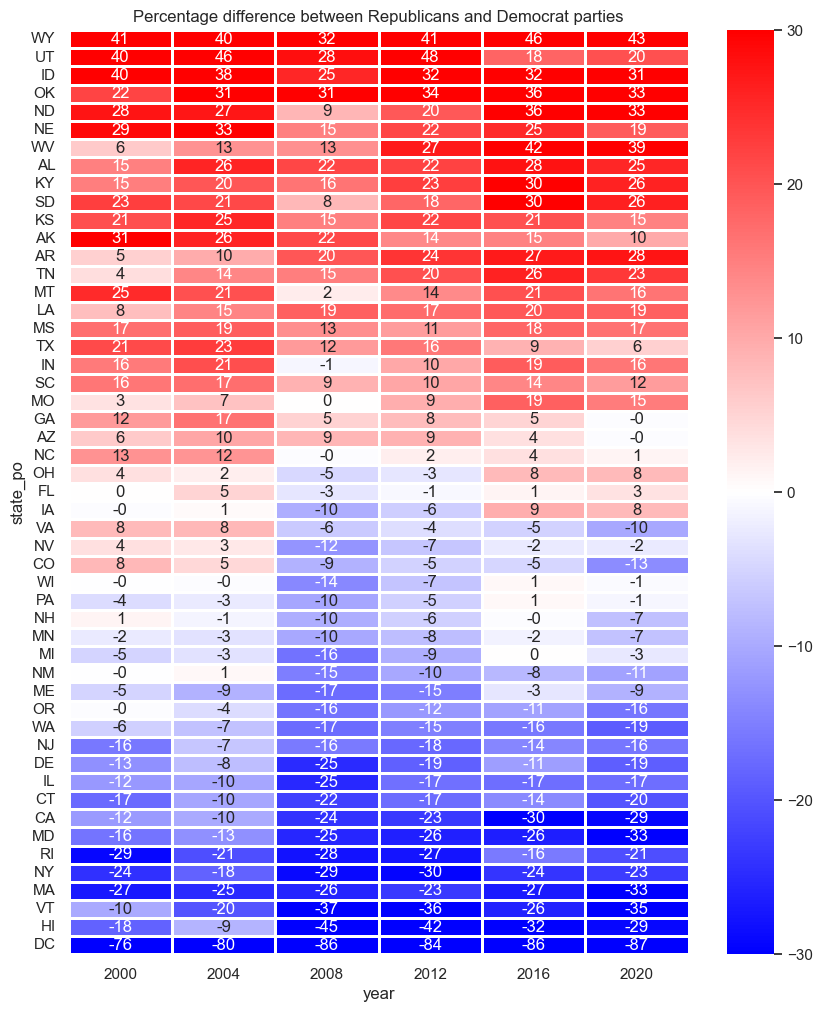

In [29]:
# display heatmap showing the percentages of voters for republicans (red) and democrats (blue) for each state for each election year
plt.figure(figsize = (10, 12))
sns.heatmap(data = delta_df.sort_values(by = 'Average', ascending = False).drop('Average', axis = 1),linewidths = 0.8, cmap = 'bwr', vmax = 30, vmin = -30, center = 0, annot = True, fmt = '.0f').set_title('Percentage difference between Republicans and Democrat parties');

Here, we can identify three top 5 :

    - Top 5 most Republican states
    - Top 5 most Democrat states
    - Top 5 most swing states (states that hesitate the most for which parti to vote for)

In [30]:
# top 10 most republican states
rep_df = rep_year_score_df.sort_values(by = 'Average', ascending = False).head(10)

# top 10 most democrat states
dem_df = dem_year_score_df.sort_values(by = 'Average', ascending = False).head(10)

## 5. Analysis : Beer ratings vs Political oriantations

### 5.1 US states' prefered consumption type

In this section we will try to determine if the users are consuming beers :
- Locally (from a brewery in its own state)
- Nationally (US brewery)
- Internationnally (foreign brewery)

In [31]:
from section_5_analysis import compute_consumtion_type_states_preferances

# Addind a column which type of consumation is the ratings about
BA_usa['consumption_type'] = BA_usa.apply(lambda a: 'Local' if a['user_state'] == a['breweries_state'] else 'National' if a['breweries_country'] == 'United States' else 'International', axis = 1)

# Computing the consumtion type preferances by states.
loc_pref, nat_pref, interl_pref = compute_consumtion_type_states_preferances(BA_usa)

# Sorting to obtain the top state by consumtion type
top_local_states = loc_pref.sort_values(by = 'percentage', ascending = False)
top_national_states = nat_pref.sort_values(by = 'percentage', ascending = False)
top_international_states = interl_pref.sort_values(by = 'percentage', ascending = False)

# print the result for each consumption type
print("Top States for Local Consumption:")
display(top_local_states.head(10))

print("\nTop States for National Consumption:")
display(top_national_states.head(10))

print("Top States for International Consumption:")
display(top_international_states.head(10))

Top States for Local Consumption:


,user_state,consumption_type,count,consumption_type_avg_rating,percentage,state_avg_rating
13,California,Local,310590,4.013138,47.192517,3.937877
64,Michigan,Local,96256,3.906939,39.538953,3.878540
16,Colorado,Local,51669,3.863897,30.233647,3.894112
109,Oregon,Local,30013,3.957360,29.695555,3.892649
133,Vermont,Local,13752,4.089329,27.912075,3.988573
145,Wisconsin,Local,41211,3.793487,25.188250,3.908788
61,Massachusetts,Local,95329,3.966318,23.017600,3.941462
127,Texas,Local,80710,3.822031,22.152689,3.859031
67,Minnesota,Local,49311,3.941209,22.112259,3.915058
73,Missouri,Local,24812,3.823838,21.740311,3.876056



Top States for National Consumption:


,user_state,consumption_type,count,consumption_type_avg_rating,percentage,state_avg_rating
143,West Virginia,National,20744,3.860203,83.537371,3.849827
101,North Dakota,National,6518,3.820578,83.265202,3.808751
122,South Dakota,National,9491,3.752631,81.064230,3.747754
149,Wyoming,National,8879,3.842253,80.600944,3.819800
116,Rhode Island,National,38217,3.945210,80.424672,3.927720
11,Arkansas,National,15068,3.858926,80.349811,3.852688
47,Kansas,National,42168,3.841793,79.915097,3.824732
92,New Mexico,National,21153,3.885466,79.346562,3.878611
83,Nevada,National,19971,3.865753,79.268874,3.832599
23,Delaware,National,21341,3.945878,79.146269,3.934213


Top States for International Consumption:


,user_state,consumption_type,count,consumption_type_avg_rating,percentage,state_avg_rating
51,Louisiana,International,8546,3.843517,20.657981,3.872486
30,Hawaii,International,1618,3.754951,20.499176,3.844589
3,Alaska,International,2885,3.904731,20.459542,3.939769
105,Oklahoma,International,5877,3.809845,17.526542,3.861029
129,Utah,International,1395,3.684753,17.355063,3.831079
48,Kentucky,International,16139,3.816767,17.317453,3.867352
81,Nevada,International,4276,3.695634,16.972295,3.832599
0,Alabama,International,6876,3.748634,16.298860,3.825246
33,Idaho,International,2870,3.540261,15.627552,3.748051
78,Nebraska,International,4147,3.830068,15.553972,3.878574


> We observe that most of the states consume more than 80% of national production, and that the state with the highest local consumption accounts for between 30% and 40% of their total consumption. We will use these results further when analyzing the political orientations of the different states.

### 5.2 US states and their prefered beer characteristics preferences vs Rep/Dem


In following section, we use BeerAdvocate (BA) Dataframe because it's the most suitable for this analysis with its high majority of users's ratings that comes from USA (~87%).

#### 5.2.1 Top Beer Styles by State

For this primary analysis, we will only focus our observations on the 10 most republican and democrats states.

In [32]:
importlib.reload(section_5_analysis)
from section_5_analysis import *

# Compute the top n republican/democrat states.
topn_democrat, topn_republican = top_n_rep_dem(15, dem_year_, dem_year_score_df, rep_year_, rep_year_score_df)

In [138]:
BA_usa = USA_data.copy().loc[USA_data['source']=='BA']

Top 5 beer styles per state

In [57]:
pd_top5_republican,pd_top5_democrat = create_dfs_in_topn_on_metric(BA_usa,topn_republican,topn_democrat,metric = 'mean',top_m_beer=5)

In [58]:
display(pd_top5_republican)
display(pd_top5_democrat)

,Top 5,Wyoming,Oklahoma,Idaho,Utah,Alabama,West Virginia,North Dakota,Nebraska,Kentucky,South Dakota,Kansas,Arkansas,Tennessee,Mississippi,Louisiana
0,1,American Double / Imperial Stout,American Double / Imperial Stout,Quadrupel (Quad),Quadrupel (Quad),Weizenbock,Quadrupel (Quad),American Double / Imperial Stout,English Stout,American Double / Imperial Stout,Russian Imperial Stout,Quadrupel (Quad),Weizenbock,Weizenbock,Quadrupel (Quad),Lambic - Unblended
1,2,American Stout,Berliner Weissbier,Tripel,American Double / Imperial Stout,Quadrupel (Quad),American Wild Ale,Flanders Oud Bruin,American Double / Imperial Stout,Lambic - Unblended,American Double / Imperial Stout,Gueuze,American Double / Imperial Stout,Gueuze,Weizenbock,Weizenbock
2,3,American Double / Imperial IPA,Quadrupel (Quad),Russian Imperial Stout,American Strong Ale,American Wild Ale,American Double / Imperial Stout,American Barleywine,American Wild Ale,Gueuze,Belgian Strong Dark Ale,American Double / Imperial Stout,Hefeweizen,American Double / Imperial Stout,Russian Imperial Stout,Quadrupel (Quad)
3,4,American Porter,Russian Imperial Stout,American Double / Imperial Stout,Russian Imperial Stout,Gueuze,English Porter,American Double / Imperial IPA,Quadrupel (Quad),Lambic - Fruit,Oatmeal Stout,Weizenbock,Russian Imperial Stout,Quadrupel (Quad),American Double / Imperial IPA,Gueuze
4,5,American Barleywine,Weizenbock,Saison / Farmhouse Ale,American Brown Ale,American Double / Imperial Stout,Russian Imperial Stout,Quadrupel (Quad),Weizenbock,Quadrupel (Quad),Quadrupel (Quad),English Stout,Quadrupel (Quad),Russian Imperial Stout,American Double / Imperial Stout,American Double / Imperial Stout


,Top 5,Hawaii,Massachusetts,Vermont,Maryland,Rhode Island,California,New York,Connecticut,Illinois,Delaware,New Jersey,Washington,Oregon,Maine,Michigan
0,1,American Double / Imperial Stout,American Double / Imperial Stout,Lambic - Unblended,Gueuze,Gueuze,Gueuze,Gueuze,Gueuze,Gueuze,American Wild Ale,Gueuze,Gueuze,Scottish Gruit / Ancient Herbed Ale,Lambic - Unblended,Eisbock
1,2,Doppelbock,Gueuze,Gueuze,Quadrupel (Quad),Lambic - Unblended,American Double / Imperial Stout,American Double / Imperial Stout,American Double / Imperial Stout,American Double / Imperial Stout,Gueuze,American Double / Imperial Stout,American Double / Imperial Stout,Lambic - Fruit,Gueuze,American Double / Imperial Stout
2,3,American Double / Imperial IPA,American Double / Imperial IPA,American Wild Ale,American Double / Imperial Stout,American Double / Imperial Stout,American Wild Ale,Lambic - Fruit,Lambic - Fruit,English Barleywine,American Double / Imperial Stout,Quadrupel (Quad),Lambic - Fruit,Berliner Weissbier,Lambic - Fruit,Gueuze
3,4,Tripel,Eisbock,Lambic - Fruit,Eisbock,Quadrupel (Quad),English Barleywine,Quadrupel (Quad),American Double / Imperial IPA,Russian Imperial Stout,Quadrupel (Quad),Lambic - Fruit,English Barleywine,Gueuze,American Double / Imperial Stout,Lambic - Unblended
4,5,Russian Imperial Stout,Lambic - Fruit,American Double / Imperial IPA,Flanders Red Ale,American Wild Ale,Russian Imperial Stout,American Double / Imperial IPA,Flanders Red Ale,Quadrupel (Quad),Flanders Red Ale,Eisbock,Quadrupel (Quad),American Double / Imperial Stout,Quadrupel (Quad),Lambic - Fruit


#### Plot: Weighted occurences in top 5 for each beer styles

In [59]:
df_combined = create_df_weighted_counts(pd_top5_republican,pd_top5_democrat) 

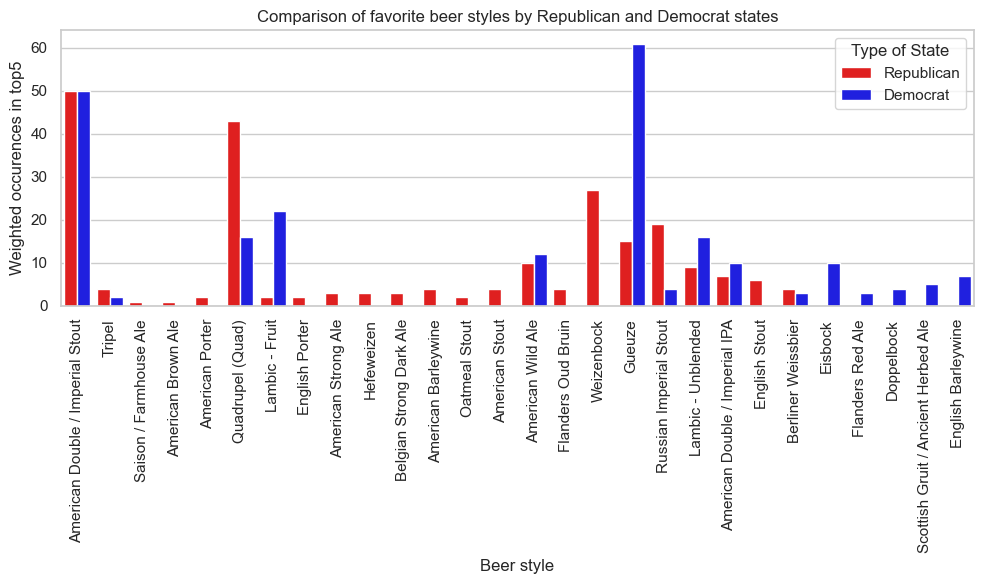

In [60]:
# create graphic
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Beer styles', y = 'Weighted count', hue = 'State type', data = df_combined, palette = {'Democrat': 'blue', 'Republican': 'red'})

# add labels and titles
plt.title('Comparison of favorite beer styles by Republican and Democrat states')
plt.xlabel('Beer style')
plt.ylabel('Weighted occurences in top5')
plt.xticks(rotation = 90)  # rotate for better readability
plt.legend(title = 'Type of State')

# display graphic
plt.tight_layout()
plt.show()

#### Plot: Mean rating of all beer styles among the top n republican and democrat states

In [61]:
# create a list with all styles that are in the top 5 beer style for each state
styles = all_styles_in_top(topn_republican,topn_democrat,pd_top5_republican,pd_top5_democrat)

In [62]:
# add the style from top5 republican to democrat and vice versa, with ratings_column (for the plot)
pd_top_republican_rating,pd_top_democrat_rating =create_dfs_in_topn_on_metric(BA_usa,topn_republican,topn_democrat,metric='mean',top_m_beer=5,styles = styles)

In [63]:
# List with strings of form : state+'_rating' to help for the plot

to_leave_rep = topn_republican + [pd_top_republican_rating.columns[0]]
to_leave_dem = topn_democrat + [pd_top_republican_rating.columns[0]]
list_rep_rating = [item for item in list(pd_top_republican_rating.columns) if item not in to_leave_rep]
list_dem_rating = [item for item in list(pd_top_democrat_rating.columns) if item not in to_leave_dem]

print(list_rep_rating)

['Wyoming_rating', 'Oklahoma_rating', 'Idaho_rating', 'Utah_rating', 'Alabama_rating', 'West Virginia_rating', 'North Dakota_rating', 'Nebraska_rating', 'Kentucky_rating', 'South Dakota_rating', 'Kansas_rating', 'Arkansas_rating', 'Tennessee_rating', 'Mississippi_rating', 'Louisiana_rating']


In [64]:
#Create combined df for the plot
df_combined = create_df_combined_for_plot(df_republican=pd_top_republican_rating,df_democrat=pd_top_democrat_rating,topn_republican=topn_republican,topn_democrat=topn_democrat,list_rep_states=list_rep_rating,list_dem_states=list_dem_rating,str_case='Rating')

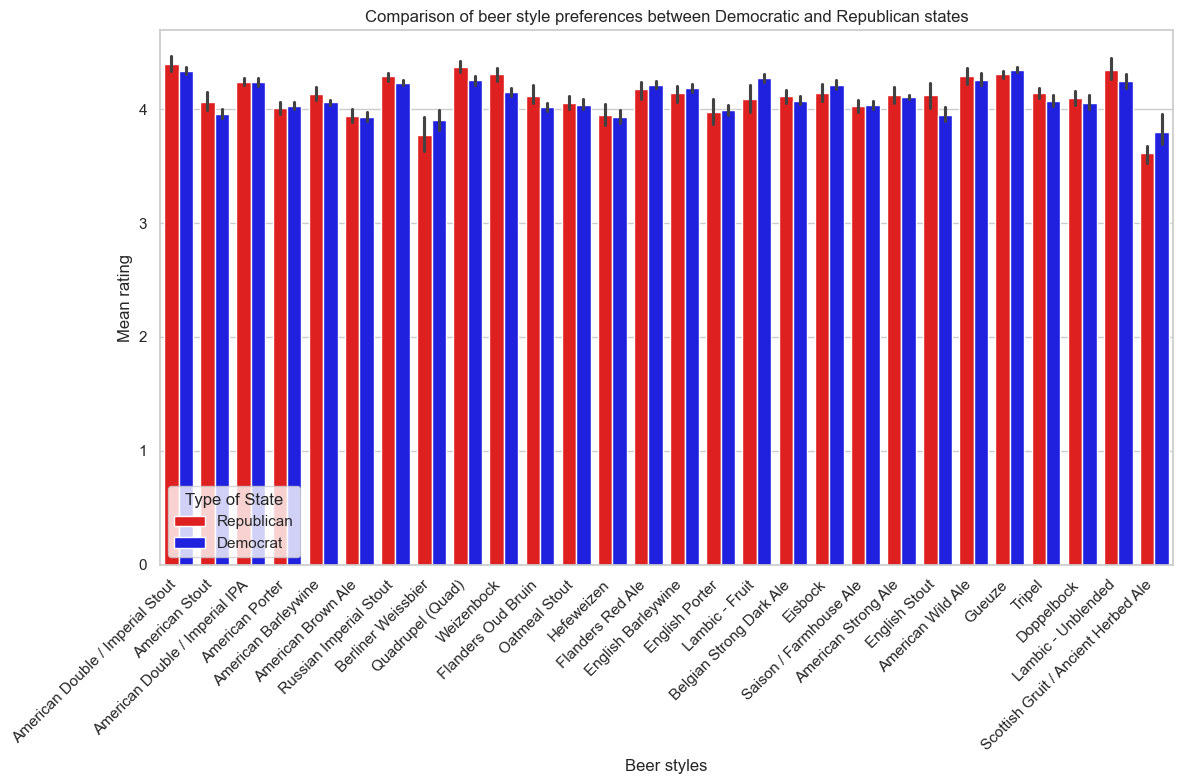

In [65]:
df_combined = df_combined.dropna(subset=['Beer style', 'Rating', 'State type'])

# create graphic
plt.figure(figsize = (12, 8))
sns.barplot(data = df_combined, x = 'Beer style', y = 'Rating', hue = 'State type', palette = {'Democrat': 'blue', 'Republican': 'red'})

# personnalise the graphic
plt.title('Comparison of beer style preferences between Democratic and Republican states')
plt.xlabel('Beer styles')
plt.ylabel('Mean rating')
plt.xticks(rotation = 45, ha = 'right') 
plt.legend(title = 'Type of State')

# display graphic
plt.tight_layout()
plt.show()

In [66]:
### The Lambic Unblended doesn't have a lot of reviews for republican states.
# Why not analyze the popularity then, i.e nb of reviews ? 
df_test_rep = BA_usa[BA_usa['user_state'].isin(topn_republican)]
df_test_dem = BA_usa[BA_usa['user_state'].isin(topn_democrat)]
# df_test_rep[df_test_rep['beer_style']=='American Double / Imperial IPA']
print('Mean rating for Republican states\n', df_test_rep.groupby('beer_style').agg({'rating':'count'}).loc['Lambic - Unblended'],'\n')
print('Mean rating for Democrat states\n', df_test_dem.groupby('beer_style').agg({'rating':'count'}).loc['Lambic - Unblended'])

Mean rating for Republican states
 rating    279
Name: Lambic - Unblended, dtype: int64 

Mean rating for Democrat states
 rating    2926
Name: Lambic - Unblended, dtype: int64


#### Plot: Popularity(nb of reviews) vs Beer styles

In [125]:
importlib.reload(section_5_analysis)
from section_5_analysis import *

In [67]:
#Create the dfs with the top 7 most popular beer styles to extract all the favorite styles among the states 
pd_top_m_rep_count,pd_top_m_dem_count =create_dfs_in_topn_on_metric(BA_usa,topn_republican,topn_democrat,metric='count',top_m_beer=7,styles = False)
styles = all_styles_in_top(topn_republican,topn_democrat,pd_top_m_rep_count,pd_top_m_dem_count)
print(len(styles))

20


In [54]:
#Create the dfs with the top 7 most popular beer styles with values for all beer style in the same top 7
pd_top_republican_count,pd_top_democrat_count =create_dfs_in_topn_on_metric(BA_usa,topn_republican,topn_democrat,metric='count',top_m_beer=7,styles = styles,filter=False,fct='count')

In [68]:
#List with strings of form : state+'_count' for the plot
to_leave_rep+=[pd_top_republican_count.columns[0]] #Add the string 'Top 7'
to_leave_dem+= [pd_top_democrat_count.columns[0]]
list_rep_count = [item for item in list(pd_top_republican_count.columns) if item not in to_leave_rep]
list_dem_count = [item for item in list(pd_top_democrat_count.columns) if item not in to_leave_dem]
print(list_rep_count)

['Wyoming_count', 'Oklahoma_count', 'Idaho_count', 'Utah_count', 'Alabama_count', 'West Virginia_count', 'North Dakota_count', 'Nebraska_count', 'Kentucky_count', 'South Dakota_count', 'Kansas_count', 'Arkansas_count', 'Tennessee_count', 'Mississippi_count', 'Louisiana_count']


In [69]:
df_combined = create_df_combined_for_plot(df_republican=pd_top_republican_count,df_democrat=pd_top_democrat_count,topn_republican=topn_republican,topn_democrat=topn_democrat,list_rep_states=list_rep_count,list_dem_states=list_dem_count,str_case='Count')

In [70]:
#popularity as a percentage among a state because imbalance in data among states
for state in topn_republican+topn_democrat:
    df_combined.loc[df_combined['State'] == state, 'Count'] = df_combined.loc[df_combined['State'] == state, 'Count'] / df_combined.loc[df_combined['State'] == state, 'Count'].sum()

C:\Users\41774\AppData\Local\Temp\ipykernel_2740\3989309522.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.19551027 0.11081038 0.08915778 0.07514727 0.06718675 0.05843019
 0.04903678 0.03009075 0.03900653 0.02324471 0.0339118  0.02738417
 0.01735392 0.01751313 0.04553415 0.02228944 0.04394205 0.02085655
 0.01735392 0.01623945]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_combined.loc[df_combined['State'] == state, 'Count'] = df_combined.loc[df_combined['State'] == state, 'Count'] / df_combined.loc[df_combined['State'] == state, 'Count'].sum()


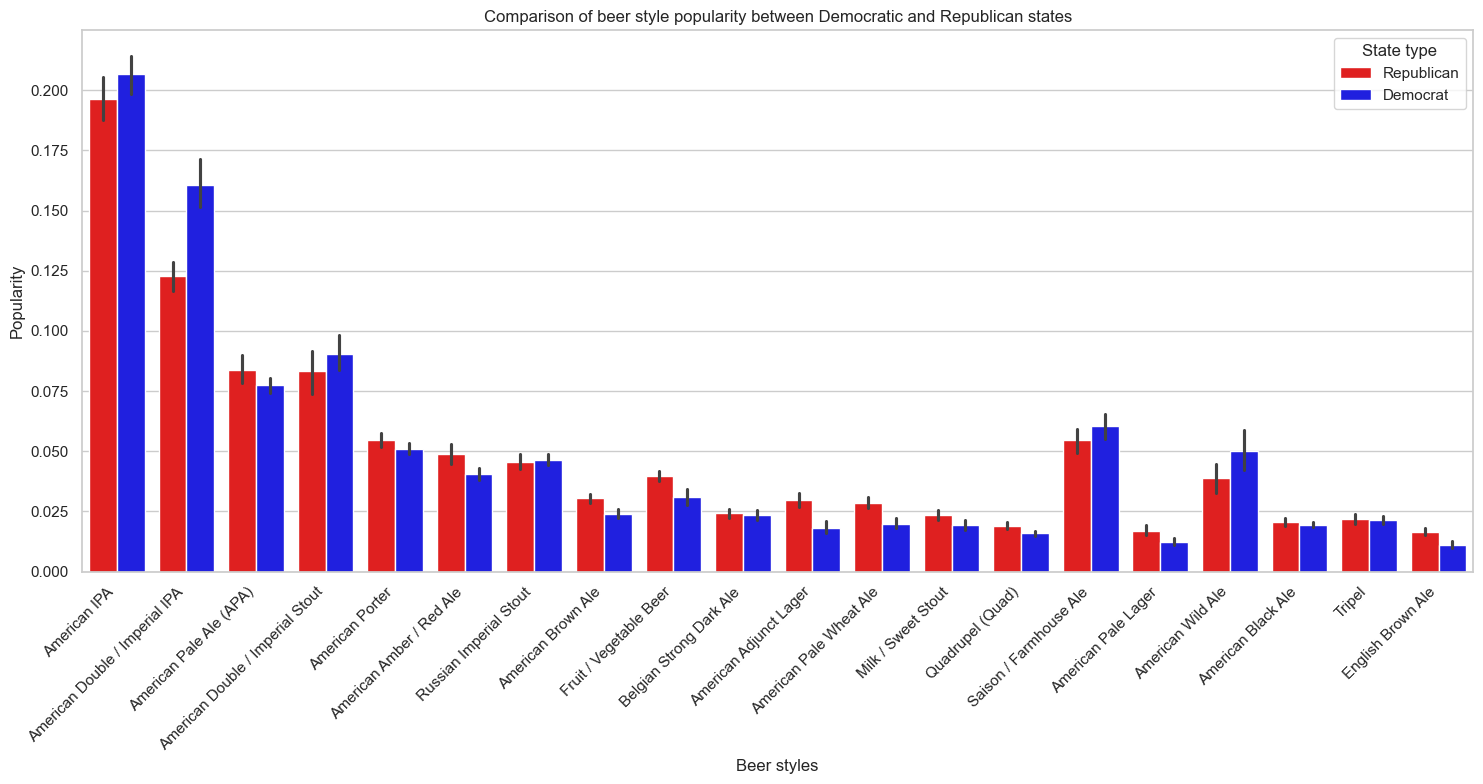

In [71]:
# Create the graph
plt.figure(figsize = (15, 8))
sns.barplot(data = df_combined, x = 'Beer style', y = 'Count', hue = 'State type', palette = {'Democrat': 'blue', 'Republican': 'red'})

# Title + labels
plt.title('Comparison of beer style popularity between Democratic and Republican states')
plt.xlabel('Beer styles')
plt.ylabel('Popularity')
plt.xticks(rotation = 45, ha = 'right')  # Rotation des labels de l'axe x pour meilleure lisibilité
plt.legend(title = 'State type')

# Plot
plt.tight_layout()
plt.show()

#### Same thing, but now we'll compare the beer styles with the preference score by state

In [133]:
importlib.reload(section_5_analysis)
from section_5_analysis import *

In [90]:
#Create the dfs with the top 4 most popular beer styles to extract all the favorite styles among the states 
pd_top_m_rep_prefscore,pd_top_m_dem_prefscore =create_dfs_in_topn_on_metric(BA_usa,topn_republican,topn_democrat,metric='mean',top_m_beer=4,styles = False,preference_score=True)
styles = all_styles_in_top(topn_republican,topn_democrat,pd_top_m_rep_prefscore,pd_top_m_dem_prefscore)
print(len(styles))

c:\Users\41774\Documents_ordi\GitHub\ada-2024-project-casiervert952\python\section_3_data_refinement.py:16: RuntimeWarning: divide by zero encountered in log10
  return np.minimum(1, np.log10(x + 1) / np.log10(max_stability_threshold))
c:\Users\41774\Documents_ordi\GitHub\ada-2024-project-casiervert952\python\section_3_data_refinement.py:16: RuntimeWarning: divide by zero encountered in log10
  return np.minimum(1, np.log10(x + 1) / np.log10(max_stability_threshold))


30


In [100]:
pd_top_republican_pref_score,pd_top_democrat_pref_score =create_dfs_in_topn_on_metric(BA_usa,topn_republican,topn_democrat,metric='mean',top_m_beer=4,styles = styles,filter=False,fct='pref_score',preference_score=True)

c:\Users\41774\Documents_ordi\GitHub\ada-2024-project-casiervert952\python\section_3_data_refinement.py:16: RuntimeWarning: divide by zero encountered in log10
  return np.minimum(1, np.log10(x + 1) / np.log10(max_stability_threshold))
c:\Users\41774\Documents_ordi\GitHub\ada-2024-project-casiervert952\python\section_3_data_refinement.py:16: RuntimeWarning: divide by zero encountered in log10
  return np.minimum(1, np.log10(x + 1) / np.log10(max_stability_threshold))


In [118]:
#List with strings of form : state+'_pref_score' for the plot
to_leave_rep+=[pd_top_republican_pref_score.columns[0]] #Add the string 'Top 7'
to_leave_dem+= [pd_top_democrat_pref_score.columns[0]]
list_rep_pscore = [item for item in list(pd_top_republican_pref_score.columns) if item not in to_leave_rep]
list_dem_pscore = [item for item in list(pd_top_democrat_pref_score.columns) if item not in to_leave_dem]
print(list_rep_pscore)

df_combined = create_df_combined_for_plot(df_republican=pd_top_republican_pref_score,df_democrat=pd_top_democrat_pref_score,topn_republican=topn_republican,topn_democrat=topn_democrat,list_rep_states=list_rep_pscore,list_dem_states=list_dem_pscore,str_case='Pscore')

['Wyoming_pref_score', 'Oklahoma_pref_score', 'Idaho_pref_score', 'Utah_pref_score', 'Alabama_pref_score', 'West Virginia_pref_score', 'North Dakota_pref_score', 'Nebraska_pref_score', 'Kentucky_pref_score', 'South Dakota_pref_score', 'Kansas_pref_score', 'Arkansas_pref_score', 'Tennessee_pref_score', 'Mississippi_pref_score', 'Louisiana_pref_score']


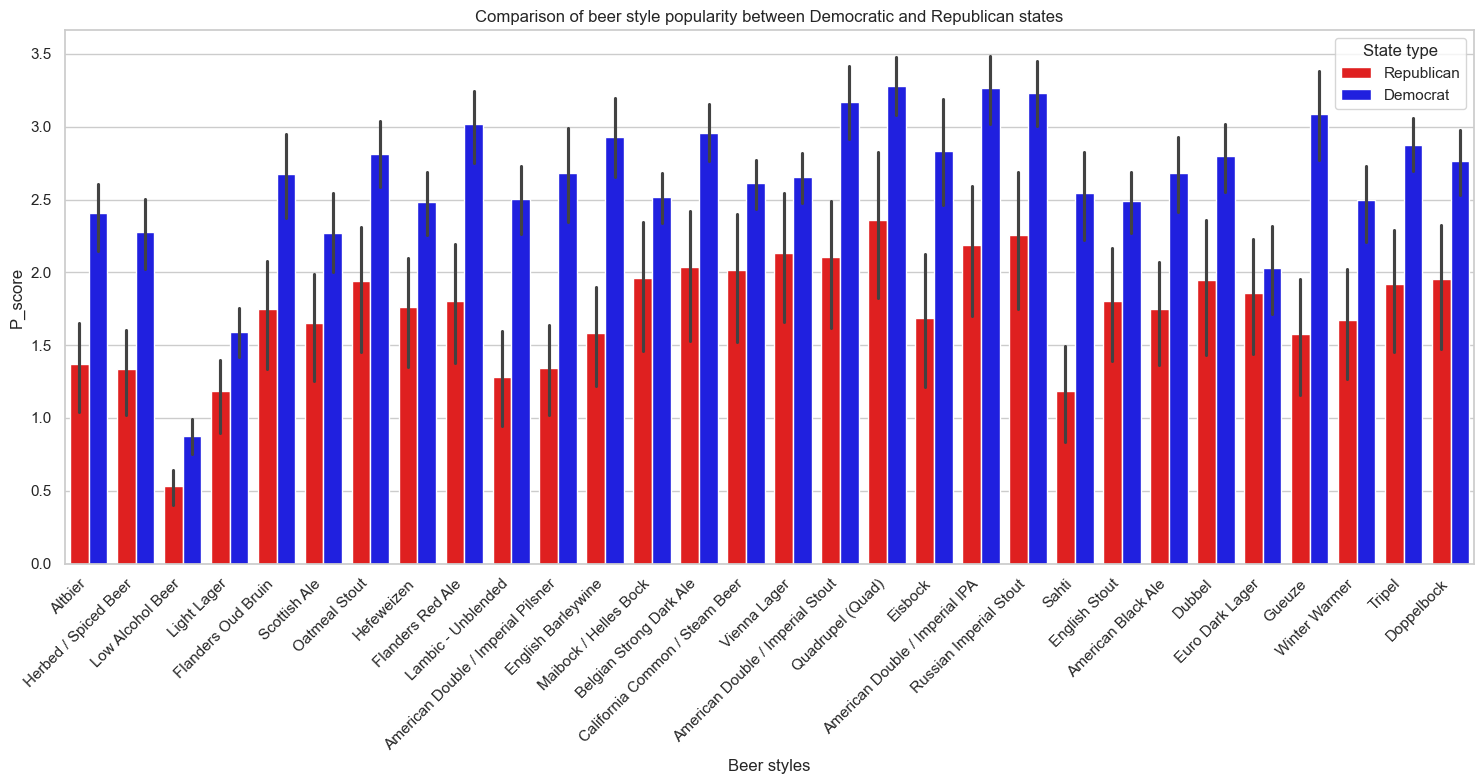

In [127]:
# Create the graph
plt.figure(figsize = (15, 8))
sns.barplot(data = df_combined, x = 'Beer style', y = 'Pscore', hue = 'State type', palette = {'Democrat': 'blue', 'Republican': 'red'})

# Title + labels
plt.title('Comparison of beer style popularity between Democratic and Republican states')
plt.xlabel('Beer styles')
plt.ylabel('P_score')
plt.xticks(rotation = 45, ha = 'right') 
plt.legend(title = 'State type')

# Plot
plt.tight_layout()
plt.show()

> *Only small differences in beer popularity, except for American Double/ Imperial IPA*

#### 5.2.2 Average Alcohol % in Top Beers

Let's try to compare the preference in alcool percentage. 

The goal is to compute the mean beer_abv for the top 10 beer of each state.

In [62]:
pd_top_republican_abv,pd_top_democrat_abv=create_df_for_abv(BA_usa,topn_republican,topn_democrat,top_m_beer=5,filter=True)

In [63]:
#Create list with column names of the df of form: state_abv
to_leave_rep+=[pd_top_republican_abv.columns[0]]
to_leave_dem+=[pd_top_democrat_abv.columns[0]]
list_rep_abv = [item for item in list(pd_top_republican_abv.columns) if item not in to_leave_rep]
list_dem_abv = [item for item in list(pd_top_democrat_abv.columns) if item not in to_leave_dem]
print(list_rep_abv)

['Wyoming_abv', 'Oklahoma_abv', 'Idaho_abv', 'Utah_abv', 'Alabama_abv', 'West Virginia_abv', 'North Dakota_abv', 'Nebraska_abv', 'Kentucky_abv', 'South Dakota_abv', 'Kansas_abv', 'Arkansas_abv', 'Tennessee_abv', 'Mississippi_abv', 'Louisiana_abv']


In [113]:
#Create df_combined for the plot
df_combined = create_df_combined_for_plot(df_republican=pd_top_republican_abv,df_democrat=pd_top_democrat_abv,topn_republican=topn_republican,topn_democrat=topn_democrat,list_rep_states=list_rep_abv,list_dem_states=list_dem_abv,str_case='Beer abv')

1.8 % of difference in median
0.05 % of difference in mean


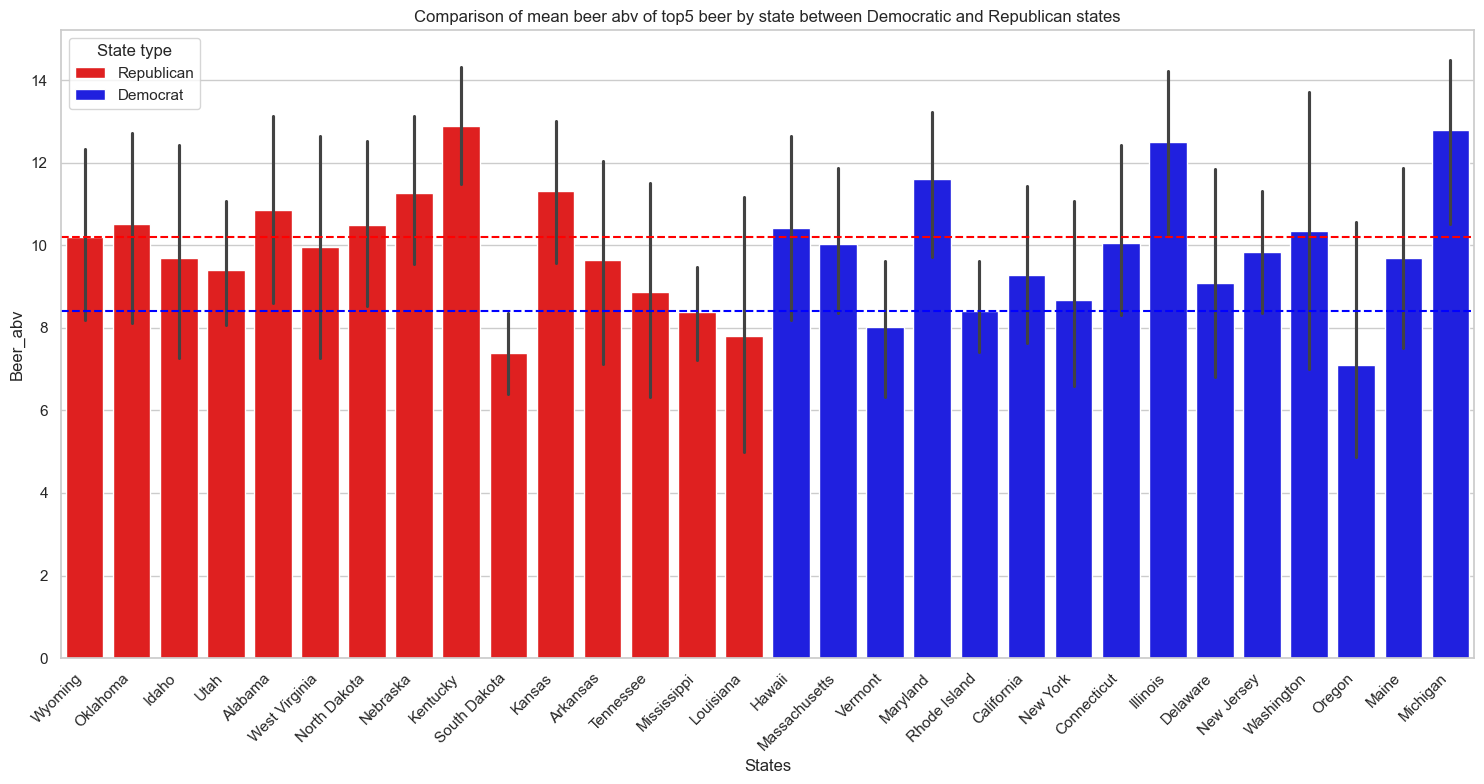

In [114]:
# Create graphic
plt.figure(figsize = (15, 8))
sns.barplot(data = df_combined, x = 'State', y = 'Beer abv', hue = 'State type', palette = {'Democrat': 'blue', 'Republican': 'red'})
#Compute mean and median
median_rep = df_combined[df_combined['State type'] == 'Republican']['Beer abv'].median()
median_dem = df_combined[df_combined['State type'] == 'Democrat']['Beer abv'].median()
mean_rep = df_combined[df_combined['State type'] == 'Republican']['Beer abv'].mean()
mean_dem = df_combined[df_combined['State type'] == 'Democrat']['Beer abv'].mean()
print(round(abs(median_dem - median_rep), 2), '% of difference in median')
print(round(abs(mean_dem - mean_rep), 2), '% of difference in mean')
plt.axhline(y = median_rep, color = 'red', linestyle = '--')
plt.axhline(y = median_dem, color = 'blue', linestyle = '--')

# personnalize graphic
plt.title('Comparison of mean beer abv of top5 beer by state between Democratic and Republican states')
plt.xlabel('States')
plt.ylabel('Beer_abv')
plt.xticks(rotation = 45, ha = 'right')  # rotate labels for better readability
plt.legend(title = 'State type')

# display
plt.tight_layout()
plt.show()

#### Statistical test on these results in the last plot

In [115]:
import scipy.stats as stats

republican_abv = df_combined[df_combined['State type'] == 'Republican'].groupby('State').agg({'Beer abv':'mean'}).values
democrat_abv = df_combined[df_combined['State type'] == 'Democrat'].groupby('State').agg({'Beer abv':'mean'}).values

#Mann-Whitney test
stat, p_value = stats.mannwhitneyu(republican_abv, democrat_abv)
print('Mann-Whitney test:')
print("Statistique U :", stat)
print("Valeur p :", p_value)

#Result interpretation
if p_value < 0.05:
    print("Significative difference in medians (reject H0).")
else:
    print("No significative difference in medians (accept H0).")

print('\n')


#Welch test
stat, p_value = stats.ttest_ind(republican_abv, democrat_abv, equal_var=False)

print('Welch test:')
print("Statistique t de Welch :", stat)
print("Valeur p :", p_value)

#Result interpretation
if p_value < 0.05:
    print("Significative difference in means (reject H0).")
else:
    print("No significative difference in means (accept H0).")


Mann-Whitney test:
Statistique U : [119.]
Valeur p : [0.80346257]
No significative difference in medians (accept H0).


Welch test:
Statistique t de Welch : [0.09796824]
Valeur p : [0.92266082]
No significative difference in means (accept H0).


==> Peu probable que les distributions soient réellement différentes (p_value >> 0.05)